In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Visualizing generalization bound for Gaussian kernel

$$f(\theta) = \sqrt{\frac{2y^TH^{-1}(\theta)y}{n}}$$ 
where
$$H(\theta)_{ij} = \frac{x_i^TC_\theta x_j\left(\pi - \arccos x_i^TC_\theta x_j\right)}{2\pi}$$
Let $x_i \in [0, 1]$ then the covariance matrix $C(\theta)$ assigns covariance coefficients to the coordinates of x that are exponentially decreasing with the distance. In other words, it makes an assumtion that nearly-placed coordinates of x are correltated:
$$C(\theta)_{ij} = \exp\left(-\frac{(i-j)^2}{2\theta^2n^2}\right)$$

In [3]:
m = 100 # number of objects
n = 10  # number of features

P = np.array([np.arange(n).tolist()]*n)
C = lambda theta: exp(-(P - P.T)**2/(2*theta**2*n**2))

In [4]:
theta_true = 0.5
C_true = C(theta_true)
np.random.seed(42)
X = np.random.multivariate_normal(np.zeros(n), C_true, size=m) 
X = X / X.sum(axis=1, keepdims=True)
beta = np.random.rand(n)
y = X.dot(beta)

In [28]:
T = X@C_true@X.T

In [39]:
X.shape[0]

100

In [40]:
import numpy as np

In [105]:
acos = lambda theta: np.array([[np.arccos(np.clip(X[i, :].dot(C(theta).dot(X[j, :]))/(np.sqrt(X[i, :].dot(C(theta).dot(X[i, :])))*np.sqrt(X[j, :].dot(C(theta).dot(X[j, :])))), -1, 1))
                                   for j in range(X.shape[0])] for i in range(X.shape[0])])
H = lambda theta: (X@X.T)*(np.pi - acos(theta))/(2*np.pi)
f = lambda theta: y.T.dot(np.linalg.inv(H(theta))).dot(y)/n
g = lambda theta: -y.T.dot(H(theta).dot(y))/n
lam = 1e-6
L = lambda theta: (1-lam)*f(theta) + lam*g(theta)

In [106]:
theta_span = np.linspace(40, 1500, 10)
f_span = np.array([f(theta) for theta in theta_span])
g_span = np.array([g(theta) for theta in theta_span])
L_span = (1-lam)*f_span + lam*g_span

In [116]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})

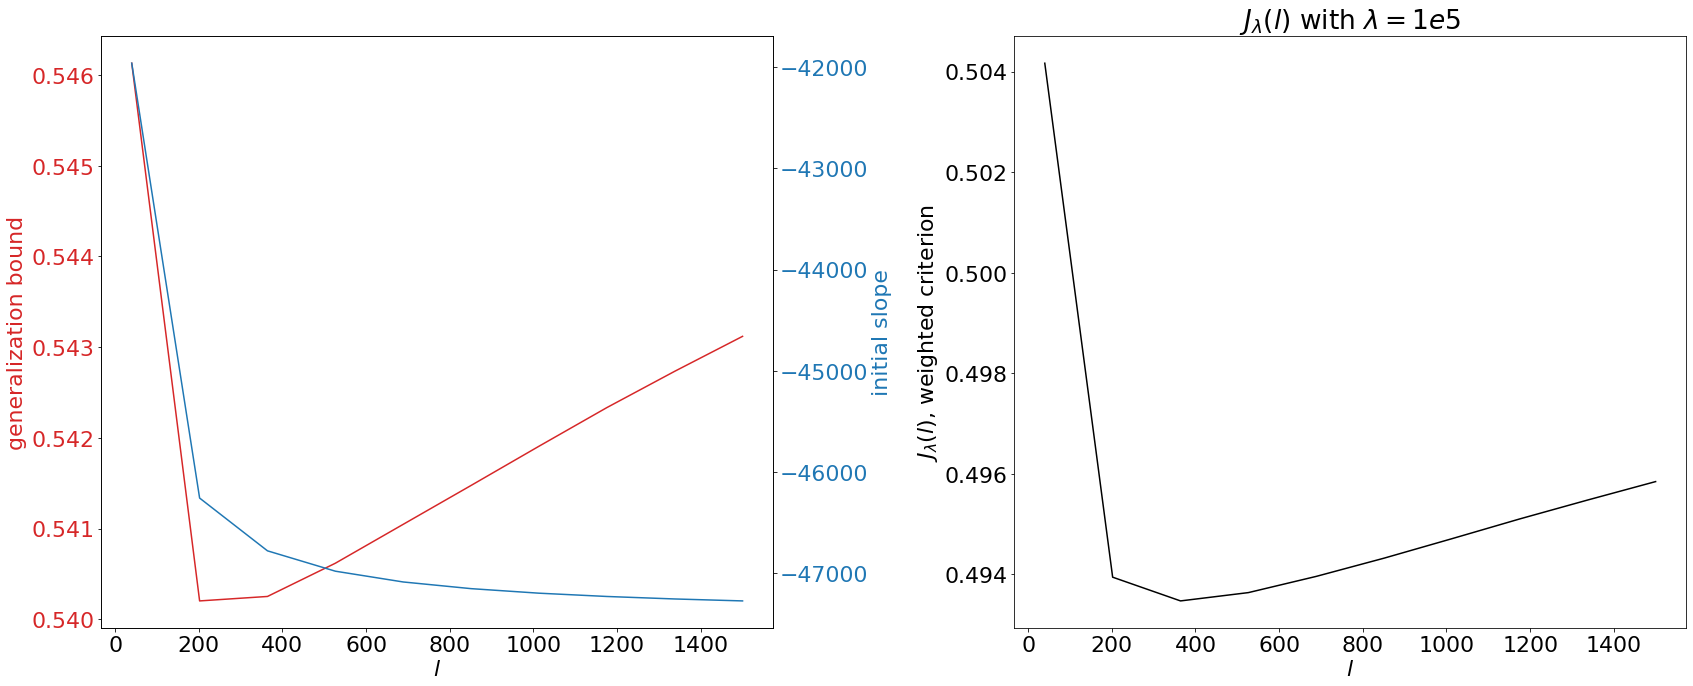

In [118]:
fig, (ax1, ax3) = plt.subplots(nrows=1, ncols=2, figsize=(24, 10))

color = 'tab:red'
ax1.set_xlabel(r'$l$')
ax1.set_ylabel('generalization bound', color=color)
ax1.plot(theta_span, f_span, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('initial slope', color=color)  # we already handled the x-label with ax1
ax2.plot(theta_span, g_span, color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax3.plot(theta_span, L_span, color="black")
ax3.set_xlabel(r'$l$')
ax3.set_ylabel('$J_\lambda(l)$, weighted criterion')
ax3.set_title(r"$J_\lambda(l)$ with $\lambda=1e5$")

fig.subplots_adjust(wspace=0.3)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [ ]:
plt.plot()